# 11. 지역별 공항 및 해외 유입 사례 (주별)         
# 6월 30일 기준, 지역별 공항 및 해외 유입 사례 히트맵 그래프
# 공항 및 해외유입사례가 지역감염에 미치는 영향 파악 가능

In [2]:
import pandas as pd
import openpyxl
import seaborn as sns
import os
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from pprint import pprint as pp
from inspect import signature

In [3]:
#final_table.csv파일도 같이 다운 받아서 작업을 해야합니다
df_patient= pd.read_csv("./DataScienceforCOVID19/final_table.csv")

In [4]:
#patient route의 type과 patientinfo데이터의 infection_case를 합쳐 놓은 df_patient
df_patient

,Unnamed: 0,patient_id,sex,age,province,city,infection_case,infected_by,latest_confirmed,type
0,0,1000000001,male,50s,Seoul,Gangseo-gu,overseas inflow,NaN,2020-01-23,NaN
1,1,1000000002,male,30s,Seoul,Jungnang-gu,overseas inflow,NaN,2020-01-30,store
2,2,1000000002,male,30s,Seoul,Jungnang-gu,overseas inflow,NaN,2020-01-30,restaurant
3,3,1000000002,male,30s,Seoul,Jungnang-gu,overseas inflow,NaN,2020-01-30,hospital
4,7,1000000004,male,20s,Seoul,Mapo-gu,overseas inflow,NaN,2020-01-30,NaN
...,...,...,...,...,...,...,...,...,...,...
1316,13774,6014000001,NaN,NaN,Incheon,Namdong-gu,NaN,NaN,NaN,airport
1317,13943,6100000090,NaN,NaN,Incheon,Jung-gu,NaN,NaN,NaN,airport
1318,13944,6100000090,NaN,NaN,Seoul,Gangseo-gu,NaN,NaN,NaN,airport
1319,13946,6100000090,NaN,NaN,Busan,Gangseo-gu,NaN,NaN,NaN,airport


In [5]:
#상단에 df_patient는 정확한 날짜 및 주별 정보가 없어서 그런 정보가 들어 있는 NJ.csv 을 따로 만들었습니다
#NJ.csv라는 파일도 같이 보내드립니다
df_dates= pd.read_csv("NJ.csv")

In [6]:
df_dates

,Unnamed: 0,PATIENT_ID,AGE,CITY,latest_confirmed,week_number
0,0,1000000001,50s,Gangseo-gu,2020-01-23,4
1,1,2000000001,50s,Goyang-si,2020-01-26,4
2,2,2000000002,50s,Pyeongtaek-si,2020-01-27,5
3,3,1000000003,50s,Jongno-gu,2020-01-30,5
4,4,1000000004,20s,Mapo-gu,2020-01-30,5
...,...,...,...,...,...,...
5115,5115,1500000119,70s,Seo-gu,2020-06-30,27
5116,5116,1400000343,NaN,NaN,2020-06-30,27
5117,5117,1500000121,10s,Dong-gu,2020-06-30,27
5118,5118,1400000342,NaN,NaN,2020-06-30,27


In [7]:
#df_patient 데이터에 필요없는 컬럼 삭제

In [8]:
del df_patient['sex']

In [9]:
del df_patient['Unnamed: 0']

In [10]:
del df_patient['latest_confirmed']

In [11]:
df_patient

,patient_id,age,province,city,infection_case,infected_by,type
0,1000000001,50s,Seoul,Gangseo-gu,overseas inflow,NaN,NaN
1,1000000002,30s,Seoul,Jungnang-gu,overseas inflow,NaN,store
2,1000000002,30s,Seoul,Jungnang-gu,overseas inflow,NaN,restaurant
3,1000000002,30s,Seoul,Jungnang-gu,overseas inflow,NaN,hospital
4,1000000004,20s,Seoul,Mapo-gu,overseas inflow,NaN,NaN
...,...,...,...,...,...,...,...
1316,6014000001,NaN,Incheon,Namdong-gu,NaN,NaN,airport
1317,6100000090,NaN,Incheon,Jung-gu,NaN,NaN,airport
1318,6100000090,NaN,Seoul,Gangseo-gu,NaN,NaN,airport
1319,6100000090,NaN,Busan,Gangseo-gu,NaN,NaN,airport


In [12]:
#NJ의 데이터와 df_patient 를 patient_id를 기준으로 잡아서 합쳤습니다
dateAdded = pd.merge(df_patient, df_dates, left_on='patient_id', right_on='PATIENT_ID', how='inner')

In [13]:
dateAdded.to_csv("int.csv")


In [14]:
dateAdded.tail(60)

,patient_id,age,province,city,infection_case,infected_by,type,Unnamed: 0,PATIENT_ID,AGE,CITY,latest_confirmed,week_number
1213,6010000022,20s,Gyeongsangbuk-do,Seongju-gun,overseas inflow,NaN,NaN,2389,6010000022,20s,Seongju-gun,2020-03-22,12
1214,6013000002,40s,Gyeongsangbuk-do,Yeongyang-gun,overseas inflow,NaN,NaN,2732,6013000002,40s,Yeongyang-gun,2020-03-30,14
1215,6023000053,20s,Gyeongsangbuk-do,Pohang-si,overseas inflow,NaN,NaN,4058,6023000053,20s,Pohang-si,2020-06-02,23
1216,6100000009,30s,Gyeongsangnam-do,Geoje-si,overseas inflow,NaN,NaN,241,6100000009,30s,Geoje-si,2020-02-23,8
1217,6100000085,30s,Gyeongsangnam-do,Changwon-si,overseas inflow,NaN,hospital,2047,6100000085,30s,Changwon-si,2020-03-16,12
1218,6100000090,40s,Gyeongsangnam-do,Yangsan-si,overseas inflow,NaN,store,2560,6100000090,40s,Yangsan-si,2020-03-26,13
1219,6100000090,40s,Gyeongsangnam-do,Yangsan-si,overseas inflow,NaN,hospital,2560,6100000090,40s,Yangsan-si,2020-03-26,13
1220,6100000090,NaN,Incheon,Jung-gu,NaN,NaN,airport,2560,6100000090,40s,Yangsan-si,2020-03-26,13
1221,6100000090,NaN,Seoul,Gangseo-gu,NaN,NaN,airport,2560,6100000090,40s,Yangsan-si,2020-03-26,13
1222,6100000090,NaN,Busan,Gangseo-gu,NaN,NaN,airport,2560,6100000090,40s,Yangsan-si,2020-03-26,13


In [15]:
#필요없는 컬럼 삭제

In [16]:
del dateAdded['CITY']

In [17]:
del dateAdded['PATIENT_ID']

In [18]:
del dateAdded['AGE']

In [19]:
int_cases=dateAdded[(dateAdded.infection_case=='overseas inflow')|(dateAdded.type=='airport')]

In [20]:
del int_cases['patient_id']

In [21]:
del int_cases['infected_by']

In [22]:
# 해외 유입 사례

In [23]:
int_cases_inf= {"province": int_cases.province,
                "infection_case": int_cases.infection_case, 
                "week_number": int_cases.week_number}

int_cases_inf= pd.DataFrame(int_cases_inf)
int_cases_inf

,province,infection_case,week_number
0,Seoul,overseas inflow,4
1,Gyeonggi-do,NaN,4
2,Seoul,overseas inflow,5
3,Seoul,overseas inflow,5
4,Seoul,overseas inflow,5
...,...,...,...
1268,Incheon,NaN,8
1269,Incheon,NaN,8
1270,Incheon,NaN,8
1271,Incheon,NaN,8


In [24]:
int_cases_inf= int_cases_inf.dropna(axis= 0)
int_cases_inf= int_cases_inf.groupby(["province", "week_number"]).count()
int_cases_inf= pd.DataFrame(int_cases_inf)
int_cases_inf= int_cases_inf.reset_index()

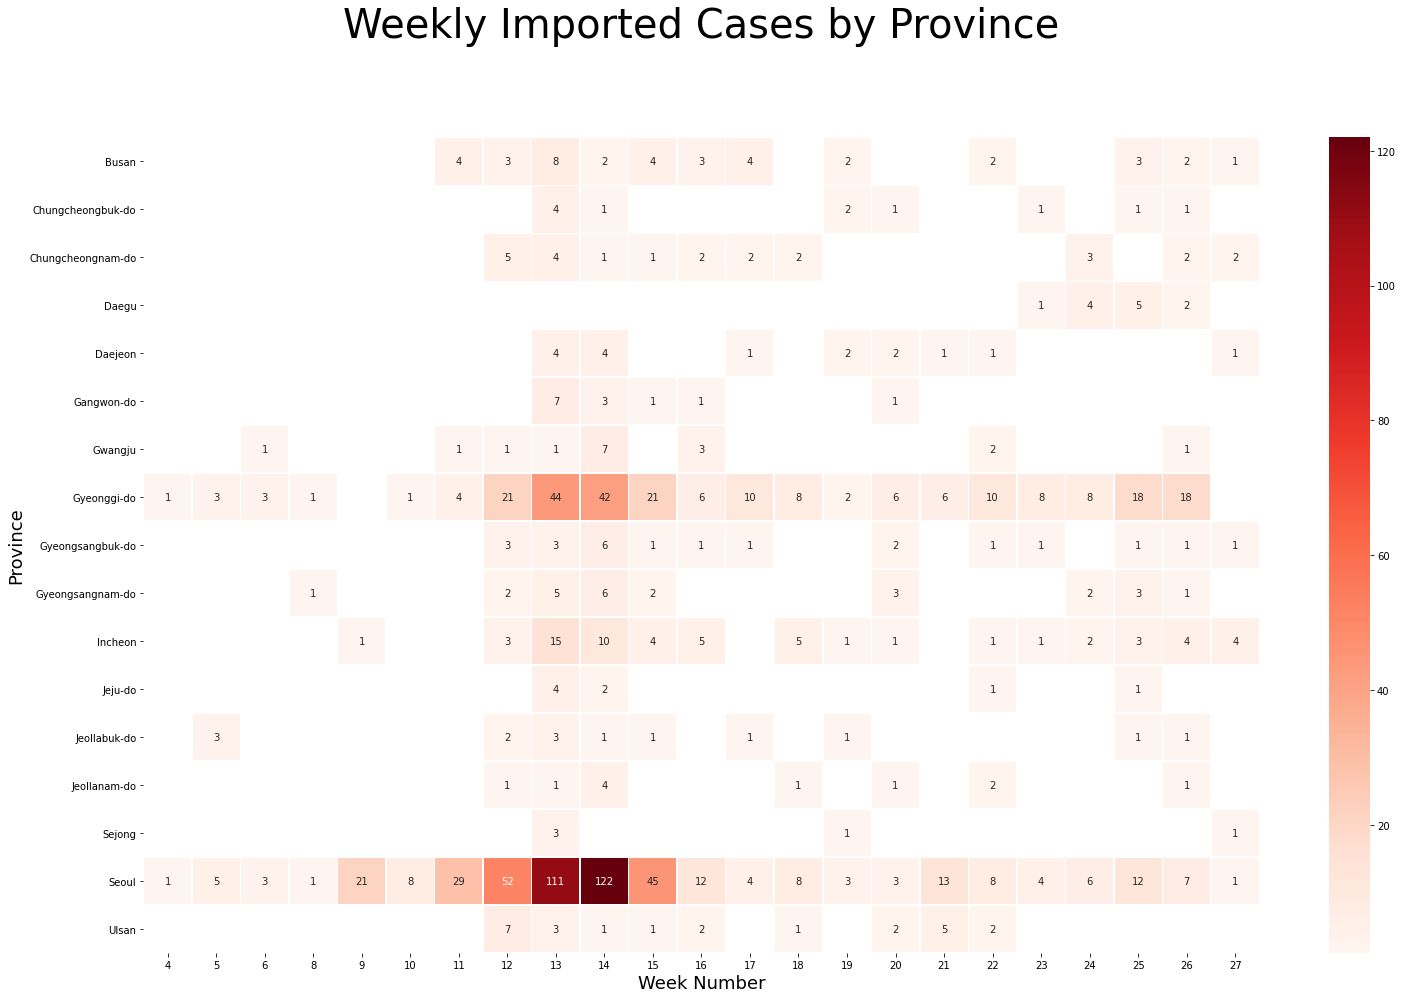

In [25]:
count = int_cases_inf.pivot("province", "week_number", "infection_case")


frame, grid = plt.subplots(figsize= (25, 15))
grid.set_title("Weekly Imported Cases by Province", fontsize=40, pad=100)
sns.heatmap(count, annot= True, linewidths= .5, ax= grid, cmap= "Reds", fmt='g')
plt.xlabel('Week Number', fontsize=18)
plt.ylabel('Province', fontsize=18)
plt.show()


In [32]:
# 공항 감염 사례

In [26]:
int_cases_typ= {"province": int_cases.province, "type": int_cases.type, "week_number": int_cases.week_number}
int_cases_typ= pd.DataFrame(int_cases_typ)
int_cases_typ= int_cases_typ.dropna(axis= 0)
int_cases_typ= int_cases_typ[int_cases_typ.type== "airport"]
int_cases_typ

,province,type,week_number
1,Gyeonggi-do,airport,4
12,Gyeongsangbuk-do,airport,9
15,Incheon,airport,9
18,Incheon,airport,9
23,Incheon,airport,9
...,...,...,...
1268,Incheon,airport,8
1269,Incheon,airport,8
1270,Incheon,airport,8
1271,Incheon,airport,8


In [27]:
int_cases_typ= int_cases_typ.groupby(["province", "week_number"]).count()
int_cases_typ= pd.DataFrame(int_cases_typ)
int_cases_typ= int_cases_typ.reset_index()
int_cases_typ

,province,week_number,type
0,Busan,11,1
1,Busan,12,2
2,Busan,13,3
3,Chungcheongnam-do,24,1
4,Gyeonggi-do,4,1
5,Gyeonggi-do,11,1
6,Gyeonggi-do,12,1
7,Gyeonggi-do,13,2
8,Gyeonggi-do,17,1
9,Gyeongsangbuk-do,9,1


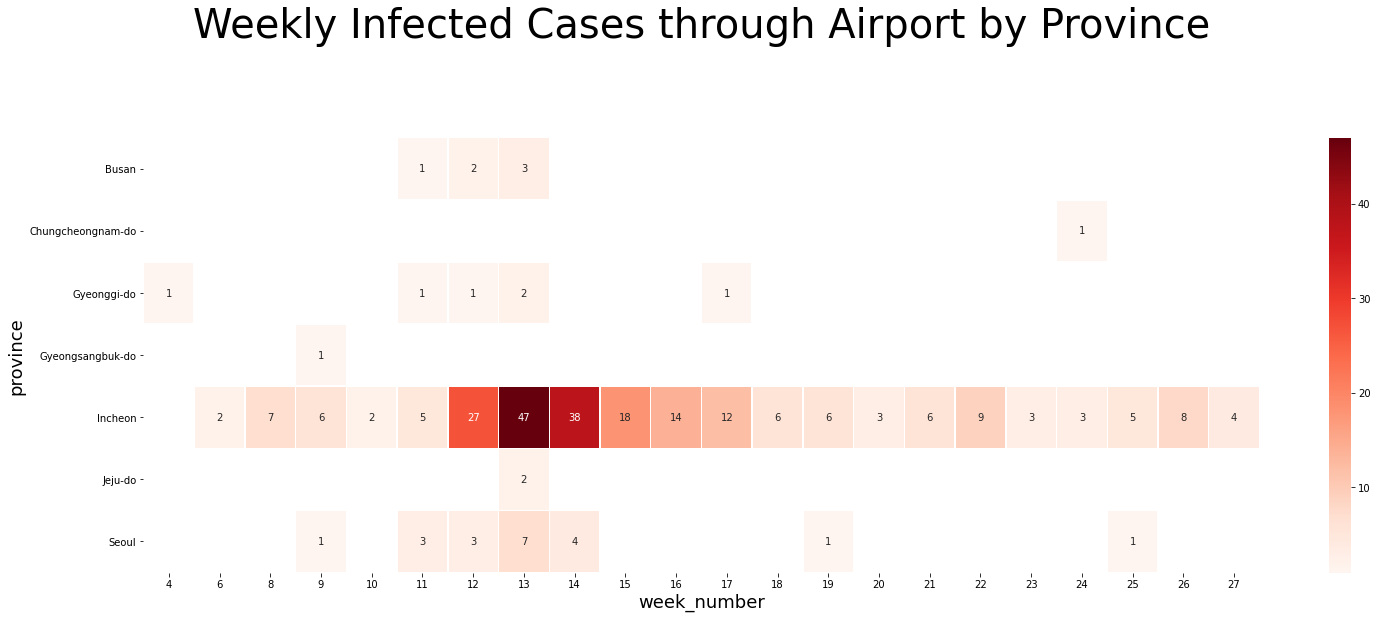

In [28]:
count = int_cases_typ.pivot("province", "week_number", "type")

frame, grid = plt.subplots(figsize= (25, 8))
grid.set_title("Weekly Infected Cases through Airport by Province", fontsize=40, pad=100)
plt.xlabel('Week Number', fontsize=18)
plt.ylabel('Province', fontsize=18)
sns.heatmap(count, annot= True, linewidths= .5, cmap= "Reds", ax= grid)
plt.show()